# Grover's Search Algorithm

*Written by Maggie Li*

The Grover's Search algorithm is a quantum algorithm for searching an unsorted database with N entries in $O(\sqrt{N})$ time. Classically, it would take O(N) time where we would need to search all entries in order to find the desired one. While this is only a quadratic speedup, it is quite significant when $N$ is large. 

*Quick history fact*: it was invented in 1996 by Lov Grover!

Unlike many other quantum algorithms that solve a 'blackbox' problem, the Grover's Search Algorithm solves a searching problem wherein the purpose is the locate on particular state with a measurement, out of $2^N$ possible states. While it's described as a 'searching' algorithm, a more accurate description would be 'inverting' a function. Essentially, given function $y=f(x)$, the algorithm allows us to calculate $x$ (input into database) when given $y$ (output of database). 

#### Use Cases for Grover's Algorithm
1. Estimating the mean and media of a set of numbers
2. Solving the collision problem [1]
3. Solving NP complete problems
4. May have interesting applications in DNA Structure [2]

Below, we'll implement the Grover's Search algorithm using *IBM's Qiskit* on 2, 3, and 4 qubits. In quantum computing (unlike classical computing), the number of possible states is $2^N$ so 2 qubits = 4 states, 3 qubits = 8 states, and 4 qubits = 16 states.

### A Quick Math Primer!

Given an unsorted list of $N$ elements, Grover's algorithm allows us to find a *target element* (in our case, a state) with $O(\sqrt N)$ operations or iterations. The reason why Grover's algorithm works so well (at least in theory) is because of its amplitude amplification, meaning it will single out the desired element without us having to search all the elements of the list.

#### Our Problem
We need to find the index of the target state among a list of $N=2^n$ elements, such that $n$ is the number of qubits and $N$ is the total size of the list. Here are the steps we need to implement to apply Grover's algorithm:

1. Prepare the qubits by putting them in uniform superposition, $|s\rangle$ by applying $H^{ \bigotimes n }|0 \rangle$.
2. Apply the Oracle $O$ to mark the target element by negating its sign such hat $O|x\rangle = -|x\rangle$.
3. Apply the Grover diffusion operator $D$ to amplify the probability amplitude of the target element.
4. Repeat steps 2-3 for about $\sqrt N$ times and then perform measurements to find the target element.  

Specifically, Grover's diffusion operator can be expressed as $2|\Psi \rangle \langle\Psi| - I_{N} = H^{ \bigotimes n }(2|0 \rangle \langle 0| - I_{N})H^{ \bigotimes n }$ (*Nielson and Chuang*)**.** $|\Psi \rangle$ is the uniform superposition of all the states and $I_{N}$ is the $N$ identity matrix. $2|\Psi \rangle \langle\Psi|$ operates a reflection about $|\Psi\rangle$ and $2|0 \rangle \langle 0| - I_{N}$ operatres a reflection about $|0\rangle$
   
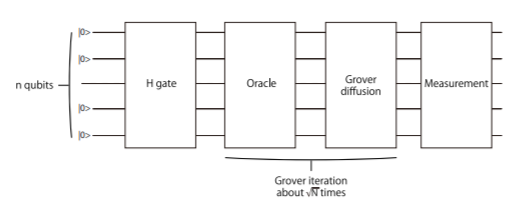
<center>Visual representation of circuit for Grover's Algorithm from [3]<center>  
<br/>

For a more visual explanation, check out my article: 


## Implementation of Grover's Search Algo

We'll be constructing quantum circuits and run it both on a quantum simulator and a real quantum computer from IBM. The goal of this is to test how close we are in terms of hardware to being able to exploit these potential benefits of quantum algorithms.

In [17]:
#Import libraries from qiskit
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from qiskit import *
from qiskit.providers.ibmq import least_busy
import math

### Grover's Search Algorithm: 2 Qubits

In [37]:
# Initializing circuit: define as 2 qubits
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')

# Create the quantum circuit
qc = QuantumCircuit(q,c)

## Step 1: Apply a Hadarmard gate to all qubits  
qc.h(q)

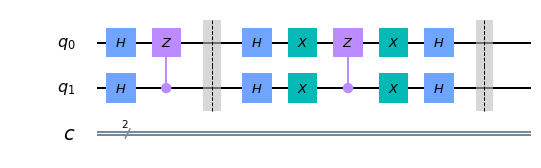

In [38]:
## Step 2: Implement the Oracle circuit for state |11> + Grover diffusion
qc.cz(q[1],q[0])
qc.barrier(q)

qc.h(q)
qc.x(q)
qc.cz(q[1],q[0])
qc.x(q)
qc.h(q)
qc.barrier(q)

qc.draw(output='mpl')

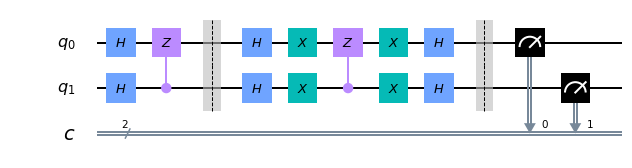

In [39]:
## Don't forget about the measurement gates!
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])

qc.draw(output='mpl')

RESULT:  {'11': 2048} 



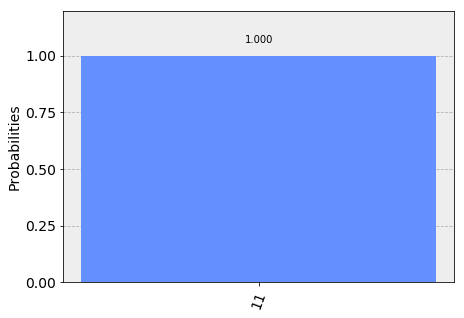

In [40]:
## Step 4: Run on backend simulator and print results
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 2048).result()
counts = result.get_counts()

print('RESULT: ',counts,'\n')

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

As expected, you can see that the amplitude of state $|11 \rangle$ is the greatest (since the amplitude is 1, it means that the algo is 100% certain about this outcome). 

In [41]:
## Step 4: Run on real device from IBM - load account and get least busy backend

provider = IBMQ.load_account()
device = least_busy(provider.backends(simulator=False))
print("Running on current least busy device: ", device)

from qiskit.tools.monitor import job_monitor
job = execute(qc, backend=device, shots=1024, max_credits=10)
job_monitor(job, interval = 2)

Running on current least busy device:  ibmq_vigo
Job Status: job has successfully run


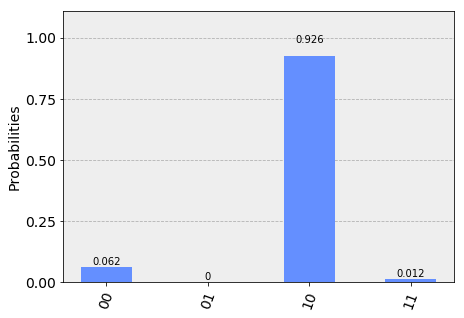

In [21]:
## Print results from device from IBM

results = job.result()
answer = results.get_counts(qc)
plot_histogram(answer)

When run on an actual quantum computer, the results will not be as accurate. However, it's still pretty good - the amplitude is telling us that the algo is 92.6% sure about the outcome (which is correct)!

-------------------------------------------------------------------------------------------------------------------------------

### Grover's Search Algorithm: 3 Qubits

In [86]:
pi = math.pi

# Initializing circuit: define as 3 qubits
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')

# Create the quantum circuit
qc = QuantumCircuit(q,c)

## Step 1: Apply a Hadarmard gate to all qubits  
qc.h(q)

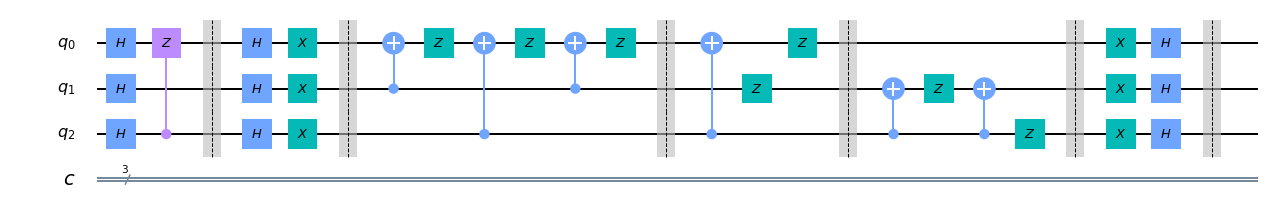

In [87]:
## Step 2: Implement the Oracle circuit for state |111> + Grover diffusion
qc.cz(q[2],q[0])
qc.barrier(q)

qc.h(q)
qc.x(q)
qc.barrier(q)

qc.cx(q[1],q[0])
qc.z(q[0]),-pi/4
qc.cx(q[2],q[0])
qc.z(q[0]),pi/4
qc.cx(q[1],q[0])
qc.z(q[0]),-pi/4
qc.barrier(q)
qc.cx(q[2],q[0])
qc.z(q[0]),pi/4
qc.z(q[1]),pi/4
qc.barrier(q)
qc.cx(q[2],q[1])
qc.z(q[1]),-pi/4
qc.cx(q[2],q[1])
qc.z(q[2]),pi/4
qc.barrier(q)

qc.x(q)
qc.h(q)
qc.barrier(q)

qc.draw(output='mpl')

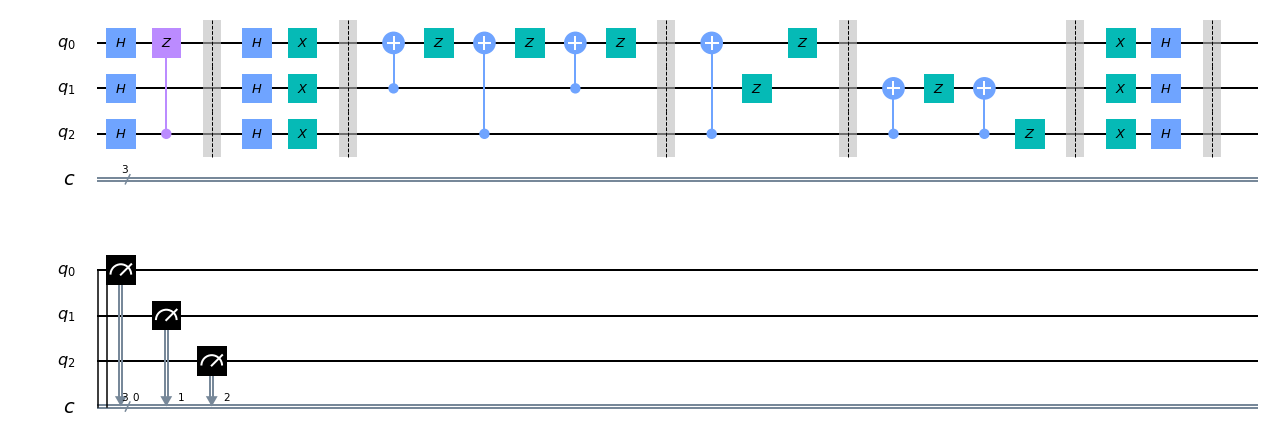

In [88]:
## Don't forget about the measurement gates!
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])

qc.draw(output='mpl')

RESULT:  {'011': 250, '100': 239, '010': 267, '101': 266, '111': 280, '001': 273, '110': 235, '000': 238} 



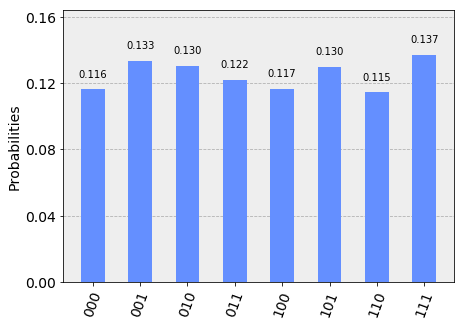

In [92]:
## Step 4: Run on backend simulator and print results
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 2048).result()
counts = result.get_counts()

print('RESULT: ',counts,'\n')

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

## Note: accuracy of this implementation is not 100% (may need to run a couple iterations before achieving desired result)

As expected, you can see that the amplitude of state $|111 \rangle$ is the greatest (even though it isn't by much). This means the circuit structure works!

Running on current least busy device:  ibmq_vigo
Job Status: job has successfully run


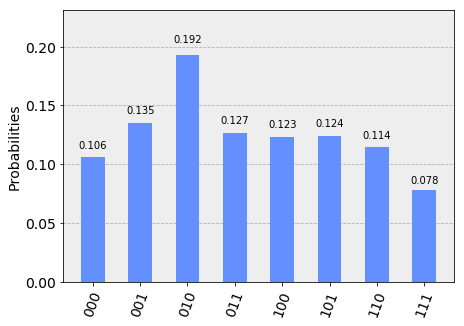

In [93]:
## Step 4: Run on real device from IBM - load account and get least busy backend

provider = IBMQ.load_account()
device = least_busy(provider.backends(simulator=False))
print("Running on current least busy device: ", device)

from qiskit.tools.monitor import job_monitor
job = execute(qc, backend=device, shots=1024, max_credits=10)
job_monitor(job, interval = 2)

## Print results from device from IBM

results = job.result()
answer = results.get_counts(qc)
plot_histogram(answer)

When run on an actual quantum computer, you can see that we lose the accuracy of the algorithm. Unfortunately, quantum hardware hasn't caught up to software (yet), so there are errors in the quantum computation due to things like quantum decoherence.

-------------------------------------------------------------------------------------------------------------------------------

### Grover's Search Algorithm: 4 Qubits

In [95]:
# Initializing circuit: define as 2 qubits
q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')

# Create the quantum circuit
qc = QuantumCircuit(q,c)

## Step 1: Apply a Hadarmard gate to all qubits  
qc.h(q)

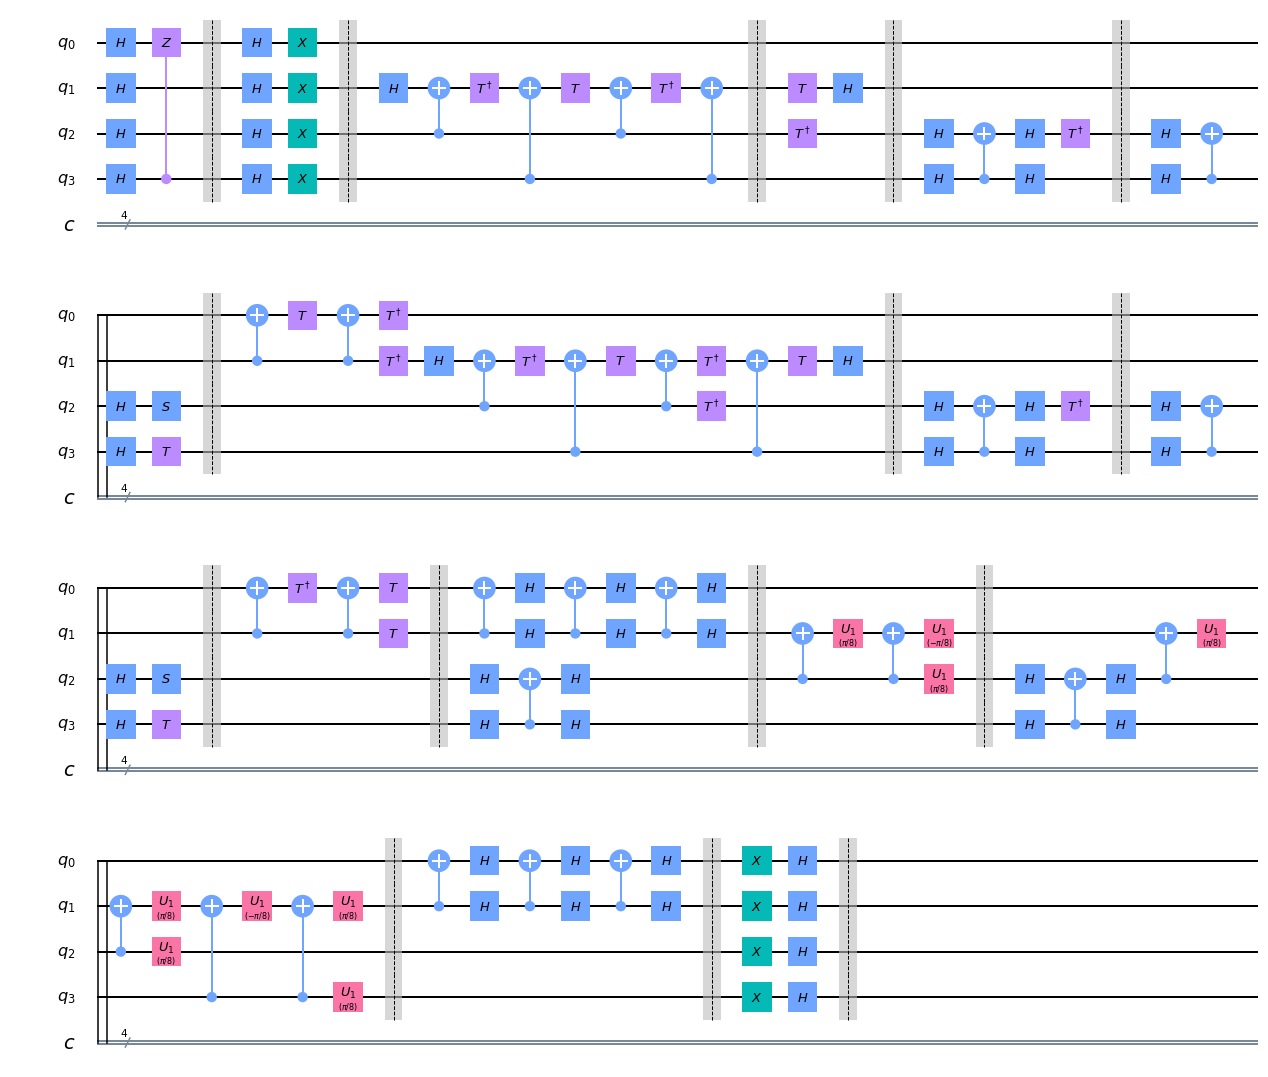

In [96]:
## Step 2: Implement the Oracle circuit for state |111> + Grover diffusion
qc.cz(q[3],q[0])
qc.barrier(q)

qc.h(q)
qc.x(q)
qc.barrier(q)

qc.h(q[1])
qc.cx(q[2],q[1])
qc.tdg(q[1])
qc.cx(q[3],q[1])
qc.t(q[1])
qc.cx(q[2],q[1])
qc.tdg(q[1])
qc.cx(q[3],q[1])
qc.barrier(q)
qc.t(q[1])
qc.tdg(q[2])
qc.h(q[1])
qc.barrier(q)
qc.h(q[2])
qc.h(q[3])
qc.cx(q[3],q[2])
qc.h(q[2])
qc.h(q[3])
qc.tdg(q[2])
qc.barrier(q)
qc.h(q[2])
qc.h(q[3])
qc.cx(q[3],q[2])
qc.h(q[2])
qc.h(q[3])
qc.s(q[2])
qc.t(q[3])
qc.barrier(q)
qc.cx(q[1],q[0])
qc.t(q[0])
qc.cx(q[1],q[0])
qc.tdg(q[0])
qc.tdg(q[1])
qc.h(q[1])
qc.cx(q[2],q[1])
qc.tdg(q[1])
qc.cx(q[3],q[1])
qc.t(q[1])
qc.cx(q[2],q[1])
qc.tdg(q[1])
qc.cx(q[3],q[1])
qc.t(q[1])
qc.tdg(q[2])
qc.h(q[1])
qc.barrier(q)
qc.h(q[2])
qc.h(q[3])
qc.cx(q[3],q[2])
qc.h(q[2])
qc.h(q[3])
qc.tdg(q[2])
qc.barrier(q)
qc.h(q[2])
qc.h(q[3])
qc.cx(q[3],q[2])
qc.h(q[2])
qc.h(q[3])
qc.s(q[2])
qc.t(q[3])
qc.barrier(q)
qc.cx(q[1],q[0])
qc.tdg(q[0])
qc.cx(q[1],q[0])
qc.t(q[0])
qc.t(q[1])
qc.barrier(q)
qc.h(q[2])
qc.h(q[3])
qc.cx(q[3],q[2])
qc.h(q[2])
qc.h(q[3])
qc.cx(q[1],q[0])
qc.h(q[0])
qc.h(q[1])
qc.cx(q[1],q[0])
qc.h(q[0])
qc.h(q[1])
qc.cx(q[1],q[0])
qc.h(q[0])
qc.h(q[1])
qc.barrier(q)
qc.cx(q[2],q[1])
qc.u1(pi/8,q[1])
qc.cx(q[2],q[1])
qc.u1(-pi/8,q[1])
qc.u1(pi/8,q[2])
qc.barrier(q)
qc.h(q[2])
qc.h(q[3])
qc.cx(q[3],q[2])
qc.h(q[2])
qc.h(q[3])
qc.cx(q[2],q[1])
qc.u1(pi/8,q[1])
qc.cx(q[2],q[1])
qc.u1(pi/8,q[1])
qc.u1(pi/8,q[2])
qc.cx(q[3],q[1])
qc.u1(-pi/8,q[1])
qc.cx(q[3],q[1])
qc.u1(pi/8,q[1])
qc.u1(pi/8,q[3])
qc.barrier(q)
qc.cx(q[1],q[0])
qc.h(q[0])
qc.h(q[1])
qc.cx(q[1],q[0])
qc.h(q[0])
qc.h(q[1])
qc.cx(q[1],q[0])
qc.h(q[0])
qc.h(q[1])
qc.barrier(q)

qc.x(q)
qc.h(q)
qc.barrier(q)

qc.draw(output='mpl')

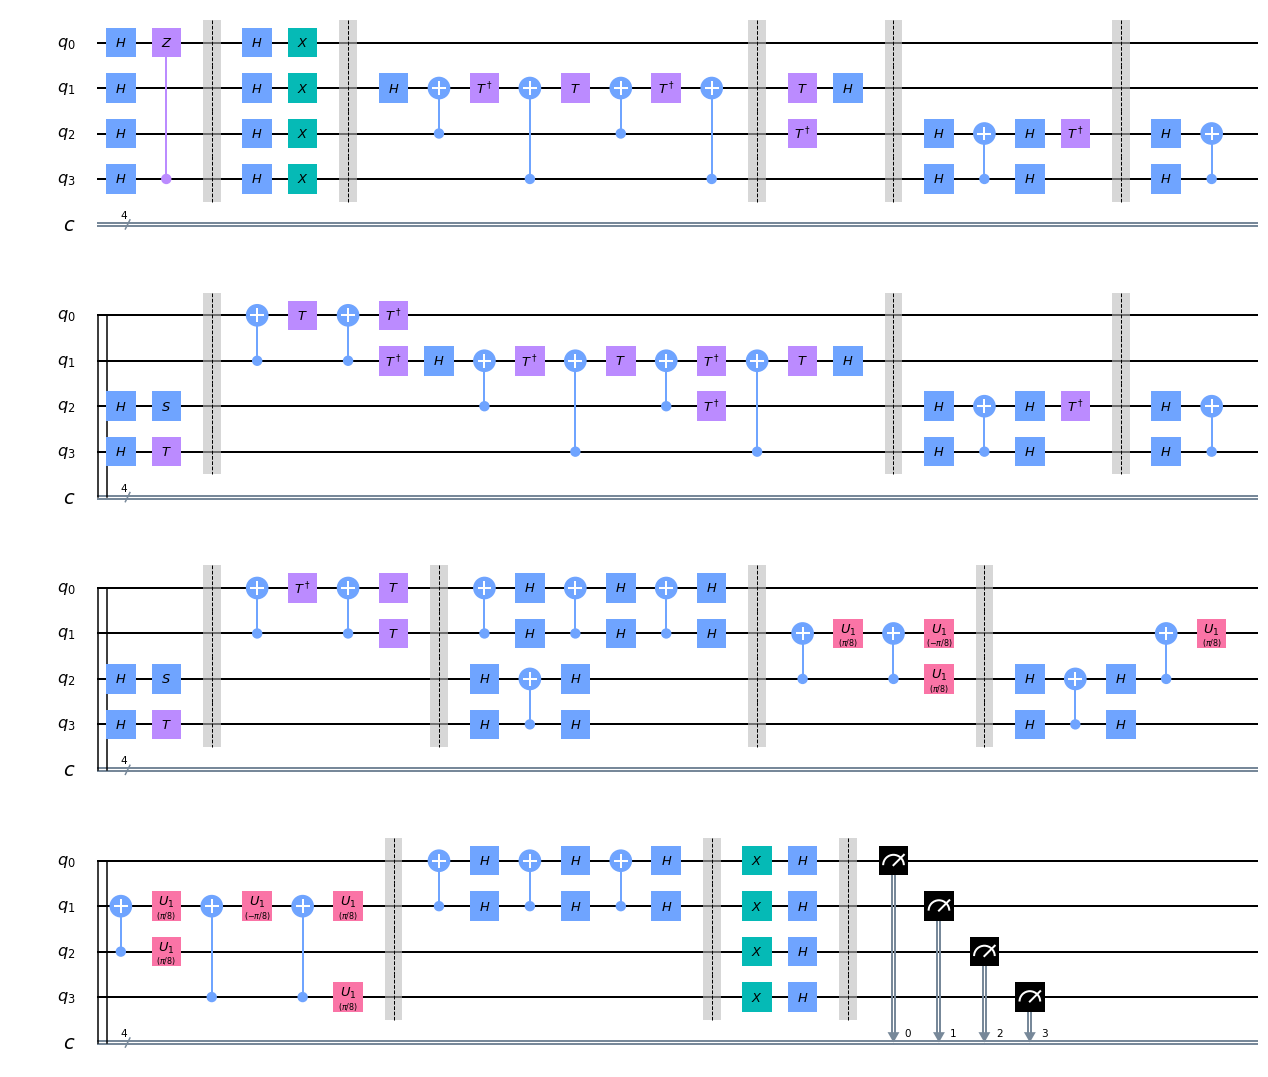

In [97]:
## Don't forget about the measurement gates!
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])
qc.measure(q[3],c[3])

qc.draw(output='mpl')

RESULT:  {'0011': 196, '1110': 71, '0010': 67, '1000': 70, '0111': 188, '0000': 59, '1101': 182, '1001': 174, '0100': 63, '0101': 198, '1010': 69, '0001': 181, '1011': 197, '1100': 64, '0110': 68, '1111': 201} 



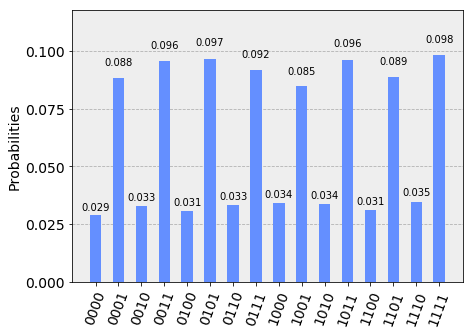

In [99]:
## Step 4: Run on backend simulator and print results
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 2048).result()
counts = result.get_counts()

print('RESULT: ',counts,'\n')

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

## Note: accuracy of this implementation not 100% (may need to run a couple iterations before achieving desired result)

As expected, you can see that the amplitude of state $|1111 \rangle$ is the greatest (even though it isn't by much). This means the algorithm worked!

Running on current least busy device:  ibmq_ourense
Job Status: job has successfully run


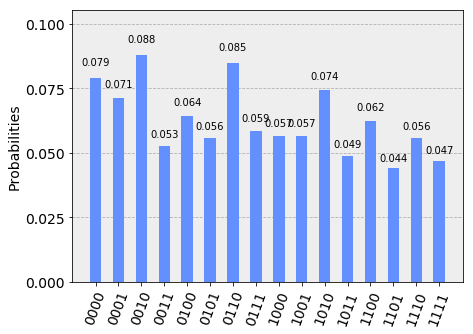

In [101]:
## Step 4: Run on real device from IBM - load account and get least busy backend

provider = IBMQ.load_account()
device = least_busy(provider.backends(simulator=False))
print("Running on current least busy device: ", device)

from qiskit.tools.monitor import job_monitor
job = execute(qc, backend=device, shots=1024, max_credits=10)
job_monitor(job, interval = 2)

## Print results from device from IBM

results = job.result()
answer = results.get_counts(qc)
plot_histogram(answer)

**And that's all for now! :)**

### Citations: References and Sources Used

**References**

[1] https://arxiv.org/pdf/quant-ph/9705002.pdf   
  [2] https://arxiv.org/abs/quant-ph/0002037


**Sources Used**

Original Paper by Lov Grover: https://arxiv.org/abs/quant-ph/9605043  
  [3] Circuit structure: https://cis.temple.edu/~boji/papers/REU2018.pdf